# Exploratory Data Analysis of Amazon Prime Dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

## Basic information about our dataset

In [2]:
df = pd.read_csv('./data/amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
df.shape

(9668, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
# country_grp = df.groupby('country').size().reset_index()
# print ((country_grp))
# sns.set(rc = {'figure.figsize':(10,40)})
# ax = sns.barplot(x = country_grp[0], y = country_grp.country)
# ax.set(xlabel="Number of movies/ TV shows in total", ylabel="country")

## Data Analysis

### Categorizing whether the given show is either a movie or a TV Show

[Text(0.5, 0, 'Either movie or TV show'),
 Text(0, 0.5, 'Number of movies or TV shows')]

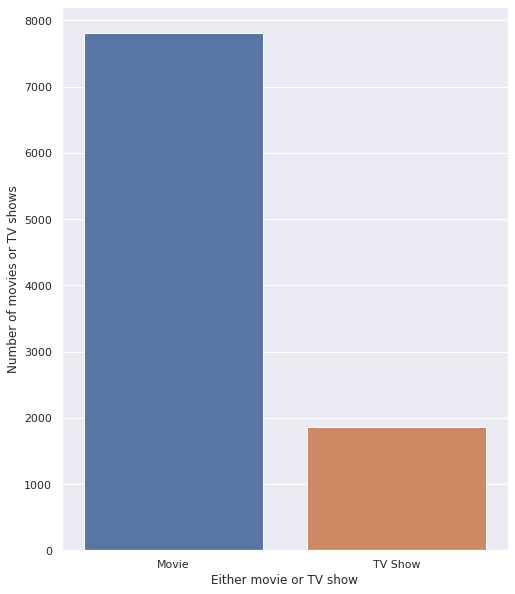

In [6]:
showtype = df['type'].value_counts().reset_index()
sns.set(rc = {'figure.figsize':(8,10)})
showtype.set_index('index', inplace=True)
ax = sns.barplot(x = showtype.index, y = showtype.type)
ax.set(xlabel = "Either movie or TV show", ylabel = "Number of movies or TV shows")

### Making a set of categories

#### Categories are mixed, hence the need to split each sentence and obtain individual categories

In [7]:
listset = set()
for item in df['listed_in']:
    templist = item.split(',')
    for x in templist:
        x = x.strip()
        listset.add(x)
print(listset)

{'Comedy', 'Sports', 'Romance', 'Action', 'Drama', 'Documentary', 'Special Interest', 'Entertainment', 'Young Adult Audience', 'Faith and Spirituality', 'Science Fiction', 'and Culture', 'International', 'Arts', 'Fantasy', 'Suspense', 'Talk Show and Variety', 'Animation', 'Unscripted', 'Adventure', 'Historical', 'Arthouse', 'Fitness', 'Anime', 'LGBTQ', 'Western', 'Military and War', 'Horror', 'TV Shows', 'Music Videos and Concerts', 'Kids'}


In [8]:
listset.remove('and Culture')
listset.add('Culture')
print(listset)

{'Comedy', 'Sports', 'Romance', 'Action', 'Drama', 'Documentary', 'Special Interest', 'Entertainment', 'Young Adult Audience', 'Faith and Spirituality', 'Science Fiction', 'International', 'Arts', 'Fantasy', 'Suspense', 'Talk Show and Variety', 'Animation', 'Unscripted', 'Adventure', 'Historical', 'Arthouse', 'Culture', 'Fitness', 'Anime', 'LGBTQ', 'Western', 'Military and War', 'Horror', 'TV Shows', 'Music Videos and Concerts', 'Kids'}


### Making a  dataframe with categories and the shows which belong to those categories

In [9]:
cat_dict = {}
for item in listset:
    cat_dict[item] = 0
for item in listset:
    for x in df['listed_in']:
        if item in x:
            cat_dict[item] += 1

ldf = pd.DataFrame(cat_dict.items())
ldf.columns = ['Category', 'Number of Shows']
ldf = ldf.sort_values(by='Number of Shows', ascending=False)
print(ldf)


                     Category  Number of Shows
4                       Drama             3687
0                      Comedy             2099
3                      Action             1657
14                   Suspense             1501
30                       Kids             1085
5                 Documentary              993
6            Special Interest              980
27                     Horror              875
2                     Romance              674
16                  Animation              547
7               Entertainment              483
12                       Arts              483
21                    Culture              483
10            Science Fiction              457
11              International              355
28                   TV Shows              263
18                  Adventure              259
25                    Western              234
1                      Sports              160
29  Music Videos and Concerts              155
17           

#### Plotting the above data

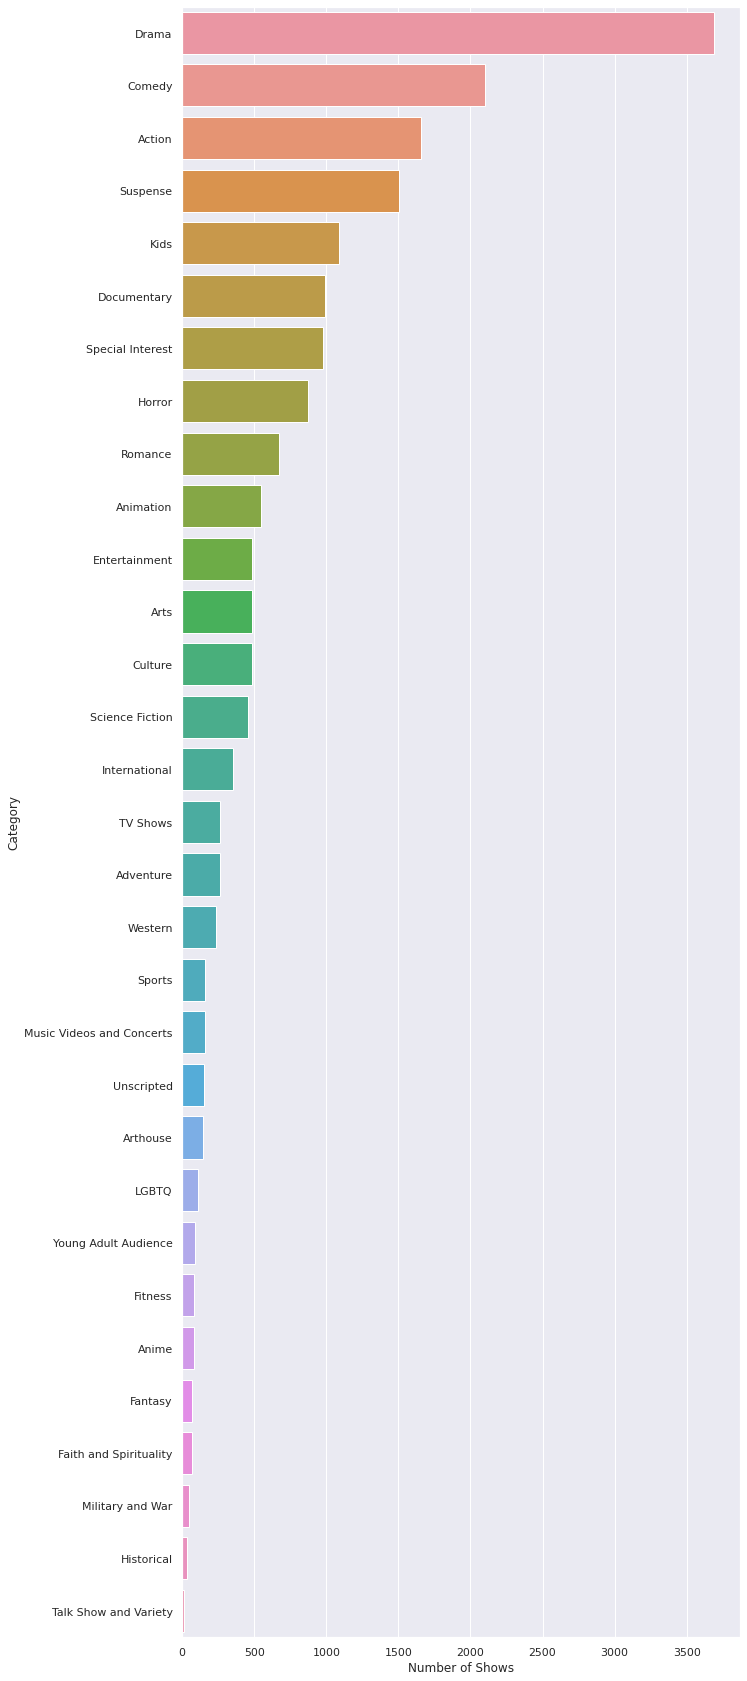

In [10]:
sns.set(rc = {'figure.figsize':(10,30)})
ax = sns.barplot(x=ldf['Number of Shows'], y=ldf['Category'])

### Categoring shows on the basis of their country of origin

#### As for reasons stated above, individual countries need to be split from each string

In [11]:
countryset = set()
for item in df['country']:
    if (isinstance(item, str)):
        item = item.split(',')
        for x in item:
            x = x.strip()
            countryset.add(x)
print(countryset)


{'Malaysia', 'Colombia', 'United Arab Emirates', 'Singapore', 'Mexico', 'Italy', 'Chile', 'France', 'Egypt', 'Luxembourg', 'South Africa', 'Ireland', 'Albania', 'Brazil', 'Netherlands', 'Germany', 'Australia', 'Portugal', 'Austria', 'India', 'Argentina', 'Hong Kong', 'Sweden', 'Switzerland', 'Kosovo', 'China', 'New Zealand', 'Japan', 'Belgium', 'Hungary', 'South Korea', 'Georgia', 'Spain', 'United Kingdom', 'Monaco', 'Czech Republic', 'Afghanistan', 'Iran', 'Norway', 'Poland', 'United States', 'Kazakhstan', 'Canada', 'Thailand', 'Denmark'}


#### Making a dataframe with the above mentioned countries and listing shows accordingly

In [12]:
country_dict = {}
for item in countryset:
    country_dict[item] = 0
for item in countryset:
    for x in df['country']:
        if type(x) == str:
            if item in x:
                country_dict[item] += 1

cdf = pd.DataFrame(country_dict.items())
cdf.columns = ['Country', 'Number of Shows']
cdf = cdf.sort_values(by='Number of Shows', ascending=False)
cdf

,Country,Number of Shows
40,United States,334
19,India,246
33,United Kingdom,67
42,Canada,35
7,France,20
15,Germany,17
5,Italy,14
32,Spain,11
44,Denmark,6
16,Australia,6


#### Plotting the above data

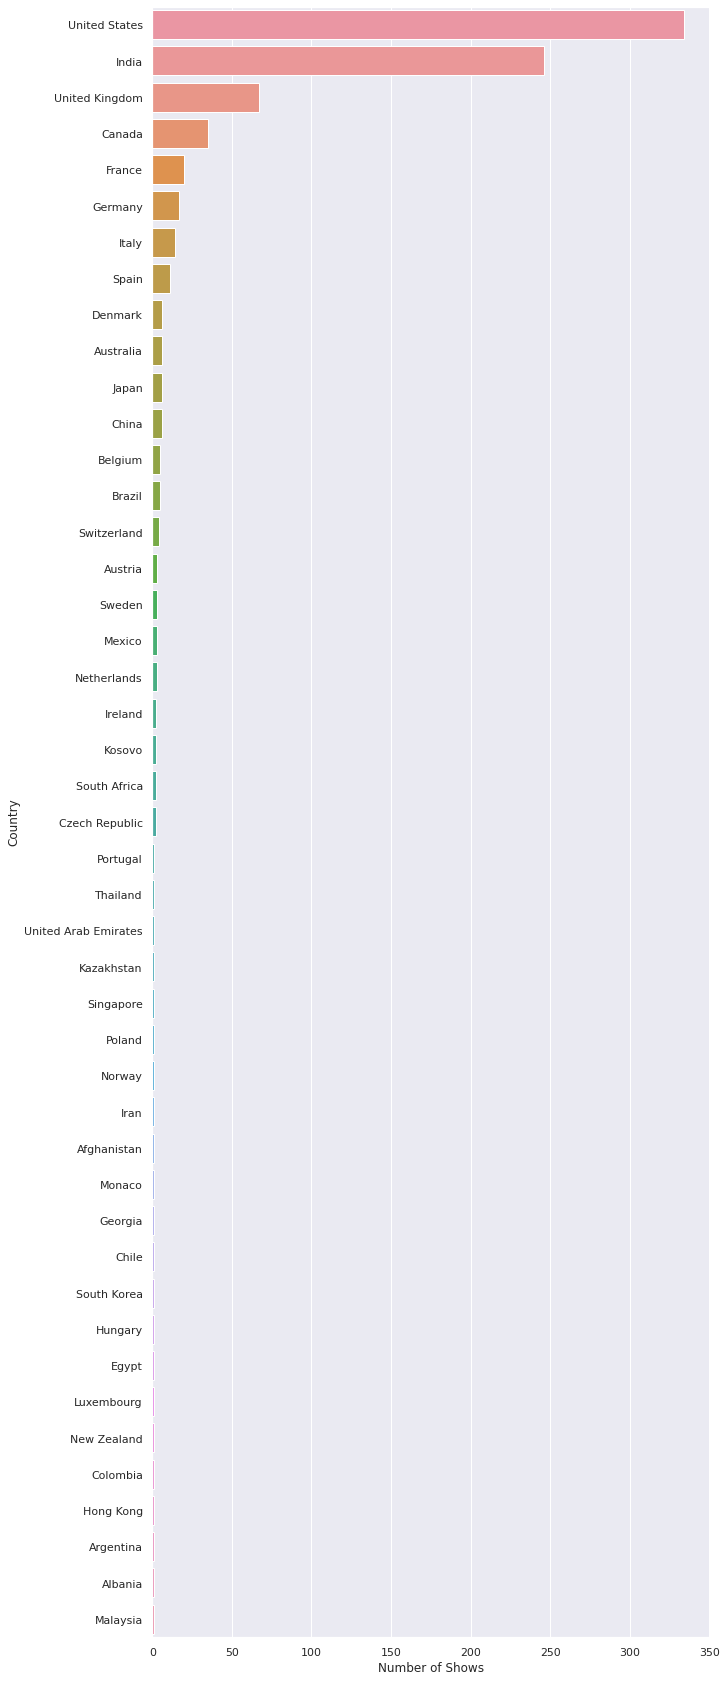

In [13]:
sns.set(rc = {'figure.figsize':(10,30)})
ax = sns.barplot(x=cdf['Number of Shows'], y=cdf['Country'])

### Categorizing shows based on their release year

In [14]:
modern_movies = 0
movies_90s = 0
movies_80s = 0
old_movies = 0
very_old_movies = 0

for year in df['release_year']:
    if (year >= 2000):
        modern_movies += 1
    elif (year >= 1990):
        movies_90s += 1
    elif (year >= 1980):
        movies_80s += 1
    elif (year >= 1960):
        old_movies += 1
    else:
        very_old_movies += 1
# print("Modern movies: ", modern_movies)
# print("Old movies: ", old_movies)
# print("Very old movies: ", very_old_movies)
data = [['Older than 1960', very_old_movies],
['60s to 80s', old_movies],
['80s', movies_80s],
['90s', movies_90s],
['After 2000', modern_movies]
]
mdf = pd.DataFrame(data, columns=['Movie period', 'Number of Movies'])
mdf

,Movie period,Number of Movies
0,Older than 1960,487
1,60s to 80s,333
2,80s,299
3,90s,577
4,After 2000,7972


#### Categorical representation

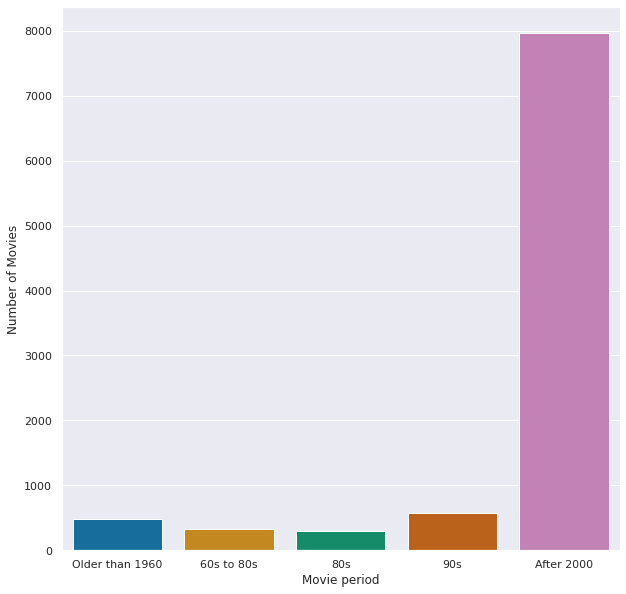

In [15]:
sns.set(rc = {'figure.figsize':(10,10)})
custom_palette = sns.color_palette("colorblind")
sns.set_palette(custom_palette)
ax = sns.barplot(x = mdf['Movie period'], y = mdf['Number of Movies'])

#### Representation using a histogram

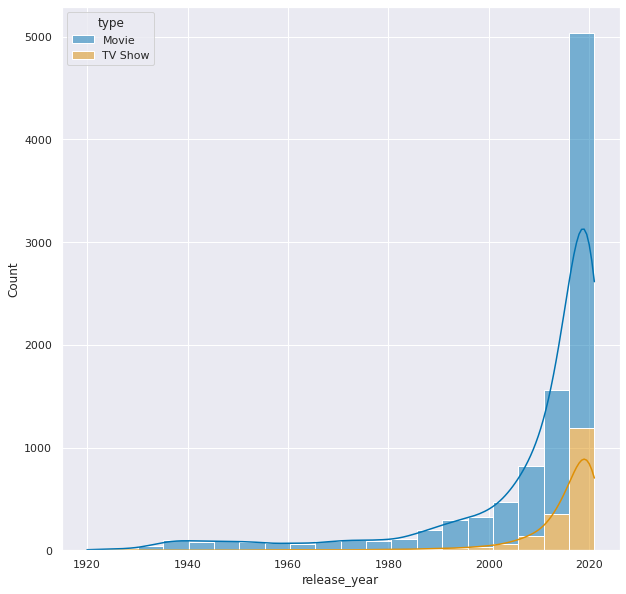

In [16]:
m2df = df['release_year'].reset_index()
sns.set(rc = {'figure.figsize':(10,10)})
custom_palette = sns.color_palette("colorblind")
sns.set_palette(custom_palette)
ax = sns.histplot(data=m2df, x='release_year', kde=True, bins=20, hue=df['type'], multiple='stack')

### Deriving subgenres/subcategories from description of the movie/show

In [17]:
sports_count = 0
crime_count = 0
cooking_count = 0
spmatches = ['golf', 'baseball', 'volleyball', 'tennis', 'swimming', 'rugby', 'hockey', 'basketball', 'soccer', 'cricket', 'badminton', 'football']
crmatches = ['killer', 'serial killer', 'murder', 'psycho', 'stabbing']
comatches = ['vegetable', 'fruit', 'meat', 'chicken', 'beef', 'pork', 'pasta', 'noodle']

for item in df['description']:
    if any(x in item for x in spmatches):
        sports_count += 1
    if any(x in item for x in crmatches):
        crime_count += 1
    if any(x in item for x in comatches):
        cooking_count += 1
print(sports_count)
print(crime_count)
print(cooking_count)
sbdict = {'Sports':sports_count, 'Crime':crime_count, 'Cooking':cooking_count}
sbdf = pd.DataFrame(sbdict.items())
sbdf.columns = ['Derived Categories', 'Number of Shows']
sbdf

137
731
31


,Derived Categories,Number of Shows
0,Sports,137
1,Crime,731
2,Cooking,31


#### Plotting the above data

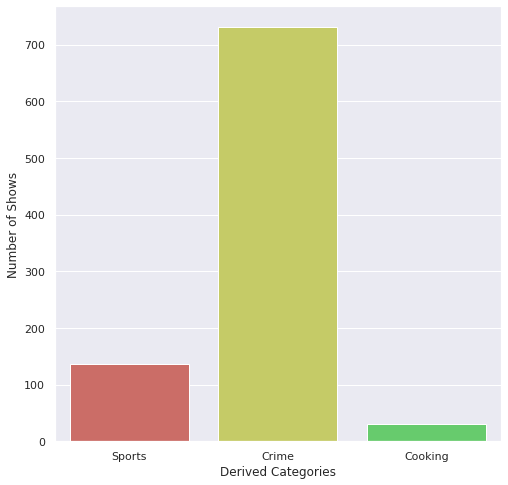

In [18]:
sns.set(rc = {'figure.figsize':(8,8)})
custom_palette = sns.color_palette("hls",6)
sns.set_palette(custom_palette)
ax = sns.barplot(x=sbdf['Derived Categories'], y=sbdf['Number of Shows'])

In [19]:
ddf = df['director'].value_counts().reset_index().head(5)
ddf.columns = ['Director/Studio Name', 'Number of movies/shows directed']
ddf

,Director/Studio Name,Number of movies/shows directed
0,Mark Knight,113
1,Cannis Holder,61
2,Moonbug Entertainment,37
3,Jay Chapman,34
4,Arthur van Merwijk,30


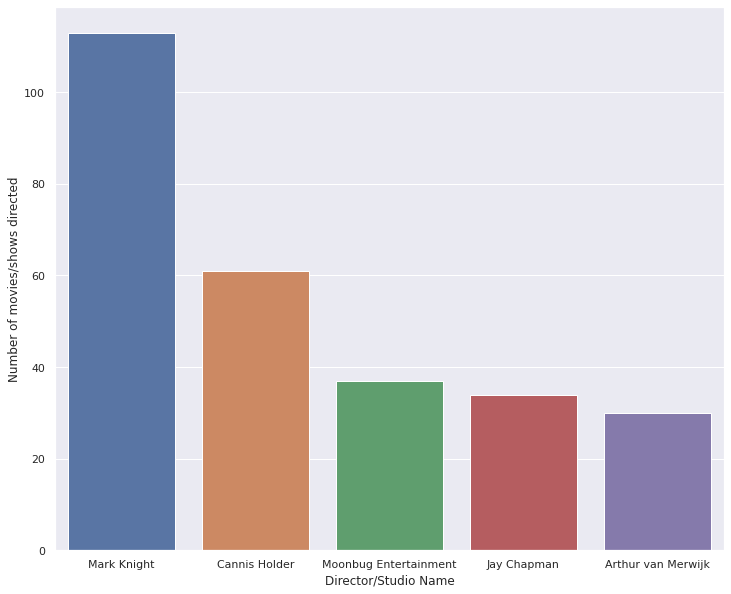

In [20]:
sns.set(rc = {'figure.figsize':(12,10)})
ax = sns.barplot (x=ddf['Director/Studio Name'], y=ddf['Number of movies/shows directed'])

In [21]:
cast_set = set()
for item in df['cast']:
    if type(item) == str:
        item = item.split(',')
        for x in item:
            x = x.strip()
            cast_set.add(x)
print(len(cast_set))

31849


In [22]:
cast_dict = {}
for item in cast_set:
    cast_dict[item] = 0
for item in df['cast']:
    if type(item) == str:
        for x in cast_set:
            if x in item:
                cast_dict[x] += 1
len(cast_dict)

31849

In [23]:
# cast_dict
# cast_dict.pop('')
sorted(cast_dict.items(), key=lambda x:x[1], reverse=True)
# matches = []
# for i in range(0,10):
#     matches.append(str(i))

# import string
# alphalist = list(string.ascii_letters)
# # print(alphalist)
# matches.extend(alphalist)
# matches.append('')
# # print(matches)

# for item in list(cast_dict):
#     for char in matches:
#         if char == item:
#             cast_dict.pop(char)

for item in list(cast_dict):
    if len(item) < 4:
        cast_dict.pop(item)
    
# print(cast_dict)


In [24]:
cdf = pd.DataFrame(cast_dict.items())
cdf.columns = ['Actor / Actress name', 'Number of shows / Movies']
cdf = cdf.sort_values(by='Number of shows / Movies', ascending=False)
c2df = cdf.head(25)
c2df

,Actor / Actress name,Number of shows / Movies
9792,Micha,528
8638,Chris,480
13729,Will,438
6435,Paul,328
30638,Steve,268
29356,Daniel,229
9662,Thomas,177
28811,Kevin,174
861,Ryan,165
3946,Brian,165


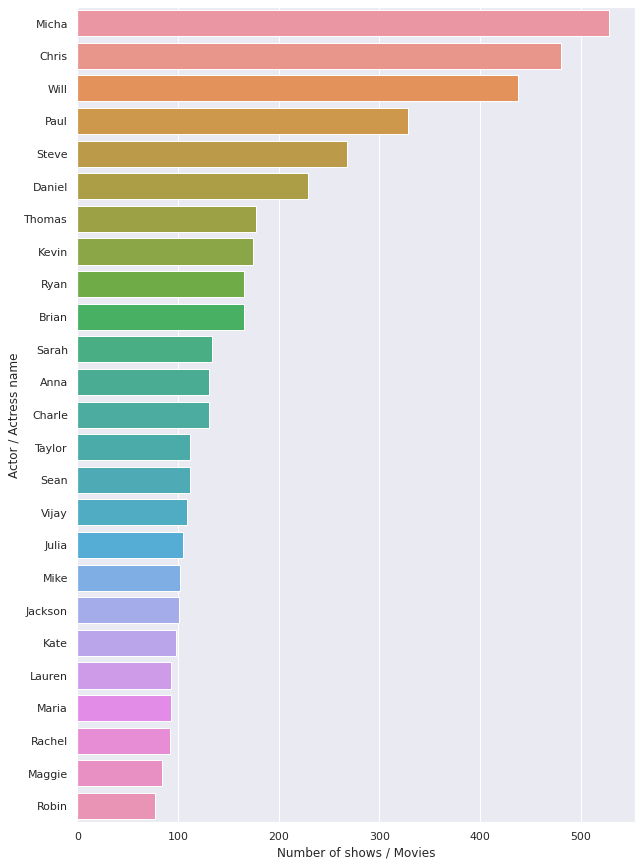

In [25]:
sns.set(rc = {'figure.figsize':(10,15)})
custom_palette = sns.color_palette("bright")
sns.set_palette(custom_palette)
ax = sns.barplot(x=c2df['Number of shows / Movies'], y=c2df['Actor / Actress name'])

In [26]:
filt = (df['listed_in'].str.contains('Drama')) | (df['listed_in'].str.contains('Kids')) | (df['listed_in'].str.contains('Action')) | (df['listed_in'].str.contains('Suspense'))
cadf = df[filt]
cadf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
...,...,...,...,...,...,...,...,...,...,...,...,...
9659,s9660,Movie,10 Things I Hate About You,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",NaN,NaN,1999,PG-13,97 min,"Comedy, Drama, Romance","On the first day at his new school, Cameron in..."
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",NaN,NaN,2021,16+,93 min,"Drama, Science Fiction, Suspense","River is a grounded Sci-Fi mystery Thriller, t..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [27]:
cadf.drop(['show_id', 'director', 'cast', 'date_added', 'rating', 'duration', 'description'], 1, inplace=True)
cadf

/home/ujwal/.local/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,type,title,country,release_year,listed_in
0,Movie,The Grand Seduction,Canada,2014,"Comedy, Drama"
1,Movie,Take Care Good Night,India,2018,"Drama, International"
2,Movie,Secrets of Deception,United States,2017,"Action, Drama, Suspense"
4,Movie,Monster Maker,United Kingdom,1989,"Drama, Fantasy"
5,Movie,Living With Dinosaurs,United Kingdom,1989,"Fantasy, Kids"
...,...,...,...,...,...
9659,Movie,10 Things I Hate About You,NaN,1999,"Comedy, Drama, Romance"
9662,Movie,River,NaN,2021,"Drama, Science Fiction, Suspense"
9665,Movie,Outpost,NaN,2008,Action
9666,TV Show,Maradona: Blessed Dream,NaN,2021,"Drama, Sports"


In [38]:
cadf.reset_index(inplace=True)
# cadf.drop('level_0', inplace=True, axis=1)
# cadf.drop('index', inplace=True, axis=1)
cadf

,index,type,title,country,release_year,listed_in,Single category
0,0,Movie,The Grand Seduction,Canada,2014,"Comedy, Drama",Drama
1,1,Movie,Take Care Good Night,India,2018,"Drama, International",Drama
2,2,Movie,Secrets of Deception,United States,2017,"Action, Drama, Suspense",Drama
3,3,Movie,Monster Maker,United Kingdom,1989,"Drama, Fantasy",Drama
4,4,Movie,Living With Dinosaurs,United Kingdom,1989,"Fantasy, Kids",Kids
...,...,...,...,...,...,...,...
6160,6160,Movie,10 Things I Hate About You,NaN,1999,"Comedy, Drama, Romance",Drama
6161,6161,Movie,River,NaN,2021,"Drama, Science Fiction, Suspense",Drama
6162,6162,Movie,Outpost,NaN,2008,Action,Action
6163,6163,TV Show,Maradona: Blessed Dream,NaN,2021,"Drama, Sports",Drama


In [39]:
# cadf['Single category'] = cadf['Single category'].replace('N/A', np.NaN)
for i in range(0, 6165):
    if 'Kids' in cadf.iloc[i]['listed_in']:
        cadf.loc[i,'Single category'] = 'Kids'
    elif 'Drama' in cadf.iloc[i]['listed_in']:
        cadf.loc[i, 'Single category'] = 'Drama'
    elif 'Action' in cadf.iloc[i]['listed_in']:
        cadf.loc[i, 'Single category'] = 'Action'
    elif 'Suspense' in cadf.iloc[i]['listed_in']:
        cadf.loc[i, 'Single category'] = 'Suspense'
# cadf['Single category'].value_counts()
cadf

/home/ujwal/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,type,title,country,release_year,listed_in,Single category
0,0,Movie,The Grand Seduction,Canada,2014,"Comedy, Drama",Drama
1,1,Movie,Take Care Good Night,India,2018,"Drama, International",Drama
2,2,Movie,Secrets of Deception,United States,2017,"Action, Drama, Suspense",Drama
3,3,Movie,Monster Maker,United Kingdom,1989,"Drama, Fantasy",Drama
4,4,Movie,Living With Dinosaurs,United Kingdom,1989,"Fantasy, Kids",Kids
...,...,...,...,...,...,...,...
6160,6160,Movie,10 Things I Hate About You,NaN,1999,"Comedy, Drama, Romance",Drama
6161,6161,Movie,River,NaN,2021,"Drama, Science Fiction, Suspense",Drama
6162,6162,Movie,Outpost,NaN,2008,Action,Action
6163,6163,TV Show,Maradona: Blessed Dream,NaN,2021,"Drama, Sports",Drama


In [40]:
print(cadf['Single category'].isnull().value_counts())
print(cadf['release_year'].isnull().value_counts())

False    6165
Name: Single category, dtype: int64
False    6165
Name: release_year, dtype: int64


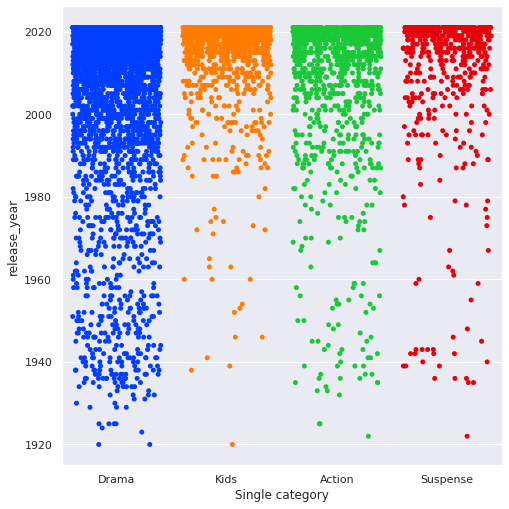

In [41]:
sns.set(rc = {'figure.figsize':(12,12)})
custom_palette = sns.color_palette("bright")
sns.set_palette(custom_palette)
ax = sns.catplot(kind='strip', data=cadf, x='Single category', y='release_year', height=7, jitter=.4)
# cadf['type'].isna().value_counts()

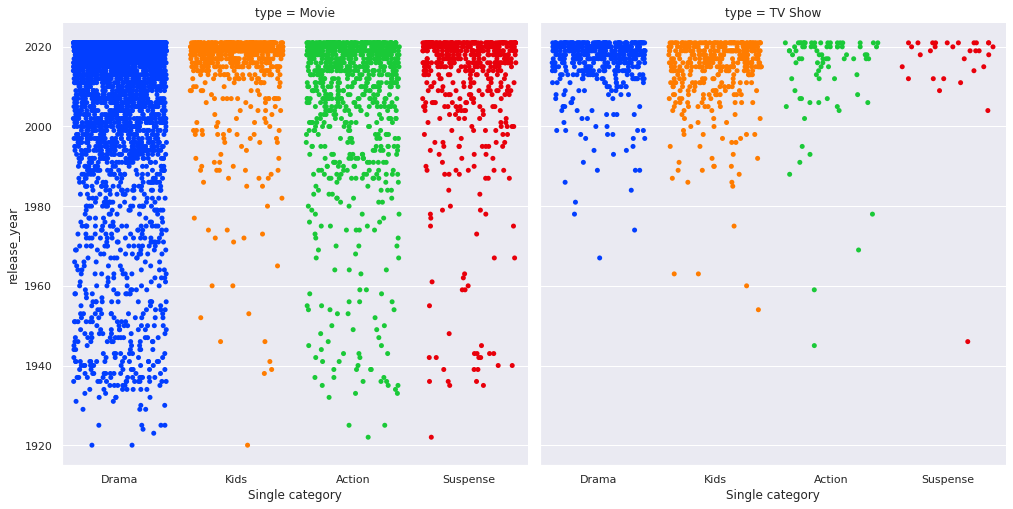

In [42]:
sns.set(rc = {'figure.figsize':(12,12)})
custom_palette = sns.color_palette("bright")
sns.set_palette(custom_palette)
ax = sns.catplot(kind='strip', data=cadf, x='Single category', y='release_year', col='type', height=7, jitter=.4)
# cadf['type'].isna().value_counts()

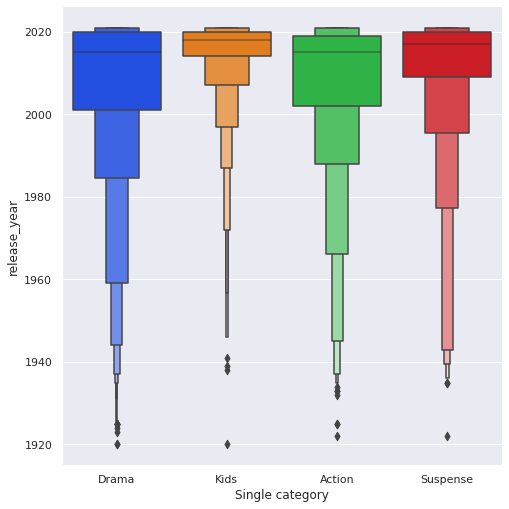

In [45]:
sns.set(rc = {'figure.figsize':(12,12)})
custom_palette = sns.color_palette("bright")
sns.set_palette(custom_palette)
ax = sns.catplot(kind='boxen', data=cadf, x='Single category', y='release_year', height=7)
# cadf['type'].isna().value_counts()

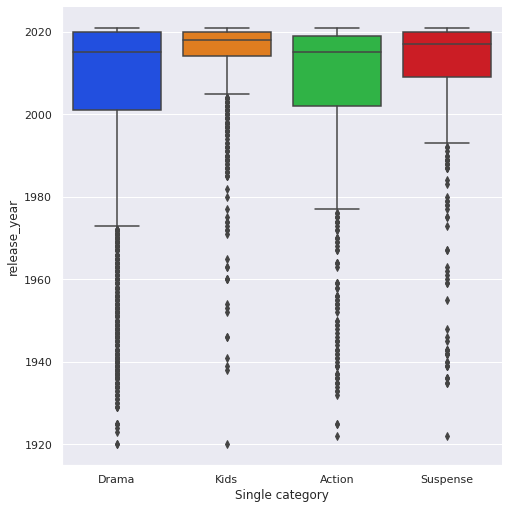

In [46]:
sns.set(rc = {'figure.figsize':(12,12)})
custom_palette = sns.color_palette("bright")
sns.set_palette(custom_palette)
ax = sns.catplot(kind='box', data=cadf, x='Single category', y='release_year', height=7)
# cadf['type'].isna().value_counts()

/home/ujwal/.local/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.9882352941176471, 0.5529411764705883, 0.3843137254901961)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


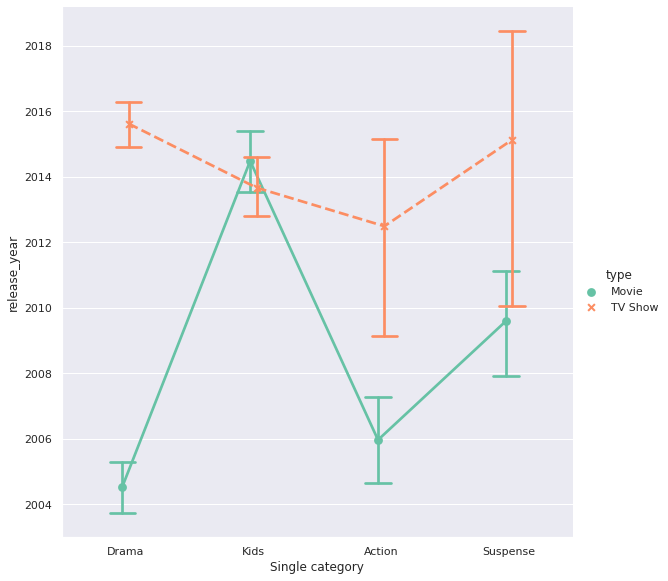

In [44]:
sns.set(rc = {'figure.figsize':(12,12)})
custom_palette = sns.color_palette("bright")
sns.set_palette(custom_palette)
ax = sns.catplot(kind='point', data=cadf, x='Single category', y='release_year', height=8, hue='type', dodge=True, palette="Set2",markers=["o", "x"],linestyles=["-", "--"], capsize=.2)
# cadf['type'].isna().value_counts()